In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,confusion_matrix,recall_score
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [4]:
input_data1 = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/train.csv")
print("the length of train csv",len(input_data1))
input_data1.head()
#input_data1.isnull().any()

the length of train csv 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
customer_input = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/customer_demographics.csv")
print("the length of customer id",len(customer_input))
customer_input.head()

the length of customer id 760


,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [33]:
cham_input = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/campaign_data.csv")
print("the length of customer id",len(cham_input))
cham_input['end_date']= pd.to_datetime(cham_input['end_date']) 
cham_input['start_date']= pd.to_datetime(cham_input['start_date'])
cham_input['duration'] = cham_input['end_date'] - cham_input['start_date']
cham_input['duration']=cham_input['duration']/np.timedelta64(1,'D')
cham_input.head()

the length of customer id 28


,campaign_id,campaign_type,start_date,end_date,duration
0,24,Y,2013-10-21,2013-12-20,60.0
1,25,Y,2013-10-21,2013-11-22,32.0
2,20,Y,2013-07-09,2013-11-16,130.0
3,23,Y,2013-08-10,2013-11-15,97.0
4,21,Y,2013-09-16,2013-10-18,32.0


In [34]:
coup_id_mapping = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/coupon_item_mapping.csv")
coup_id_mapping.head()
print(len(input_data1))
input_data2 = pd.merge(input_data1,
                 coup_id_mapping[['coupon_id','item_id']],
                left_on='coupon_id',
                       right_on='coupon_id',
                 how='left',indicator=True)
input_data2.drop_duplicates(subset =['id'],keep='first',inplace=True) 
print(len(input_data2))
input_data2.head()

78369
78369


,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,_merge
0,1,13,27,1053,0,24775,both
125,2,13,116,48,0,36721,both
128,6,9,635,205,0,4763,both
195,7,13,644,1050,0,65962,both
199,9,8,1017,1489,0,6538,both


In [35]:
item_mapping = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/item_data.csv")
item_mapping.head()
input_data3 = pd.merge(input_data2,
                 item_mapping[['item_id','brand_type','category','brand']],
                 on='item_id',how='left')
print(len(input_data3))
input_data3.head()

78369


,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,_merge,brand_type,category,brand
0,1,13,27,1053,0,24775,both,Established,Grocery,1636
1,2,13,116,48,0,36721,both,Local,Grocery,56
2,6,9,635,205,0,4763,both,Established,Pharmaceutical,560
3,7,13,644,1050,0,65962,both,Established,Grocery,611
4,9,8,1017,1489,0,6538,both,Established,Grocery,1558


In [36]:
cust_trans_data = pd.read_csv("C:/jyputerWork/amExpert/train_AUpWtIz/customer_transaction_data.csv")
cust_trans_data.head()
input_data4 = pd.merge(input_data3,
                 cust_trans_data[['item_id','selling_price']],
                 on=['item_id'],how='left')
input_data4.drop_duplicates(subset =['id'],keep='first',inplace=True) 
input_data4.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,_merge,brand_type,category,brand,selling_price
0,1,13,27,1053,0,24775,both,Established,Grocery,1636,65.54
48,2,13,116,48,0,36721,both,Local,Grocery,56,70.88
120,6,9,635,205,0,4763,both,Established,Pharmaceutical,560,266.79
122,7,13,644,1050,0,65962,both,Established,Grocery,611,81.57
124,9,8,1017,1489,0,6538,both,Established,Grocery,1558,195.55


In [37]:

input_changed = pd.merge(input_data4,
                 cham_input[['campaign_id','campaign_type','duration']],
                 on='campaign_id',how='left')
print("length of train",len(input_changed))

input_changed = pd.merge(input_changed,
                 customer_input[['customer_id','income_bracket','marital_status','rented','family_size','age_range']],
                 on='customer_id',how='left')
print("length of train",len(input_changed))

input_changed.to_csv("C:/jyputerWork/amExpert/inputFile.csv",index=False)
input_changed.isnull().any()

length of train 78369
length of train 78369


id                   False
campaign_id          False
coupon_id            False
customer_id          False
redemption_status    False
item_id              False
_merge               False
brand_type           False
category             False
brand                False
selling_price        False
campaign_type        False
duration             False
income_bracket        True
marital_status        True
rented                True
family_size           True
age_range             True
dtype: bool

In [38]:
input_changed['income_bracket'] = input_changed['income_bracket'].fillna(input_changed['income_bracket'].mode())
input_changed['marital_status'] = input_changed['marital_status'].fillna("None")
input_changed['rented'] = input_changed['rented'].fillna(-1)
input_changed['family_size'] = input_changed['family_size'].fillna("None")
input_changed['family_size'] = input_changed['family_size'].astype(str)
input_changed['age_range'] = input_changed['age_range'].fillna("None")
input_changed['age_range'] = input_changed['age_range'].astype(str)
input_changed.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,_merge,brand_type,category,brand,selling_price,campaign_type,duration,income_bracket,marital_status,rented,family_size,age_range
0,1,13,27,1053,0,24775,both,Established,Grocery,1636,65.54,X,-12.0,5.0,None,0.0,1,46-55
1,2,13,116,48,0,36721,both,Local,Grocery,56,70.88,X,-12.0,3.0,Married,0.0,2,36-45
2,6,9,635,205,0,4763,both,Established,Pharmaceutical,560,266.79,Y,31.0,7.0,Married,0.0,2,46-55
3,7,13,644,1050,0,65962,both,Established,Grocery,611,81.57,X,-12.0,NaN,None,-1.0,None,None
4,9,8,1017,1489,0,6538,both,Established,Grocery,1558,195.55,X,77.0,3.0,Married,0.0,2,46-55


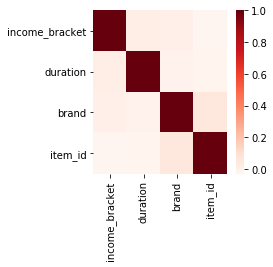

In [39]:
columnsToUse = ['income_bracket','duration','brand','item_id']
plt.figure(figsize=(3,3))
cor = input_changed[columnsToUse].corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [40]:
data = input_changed
columnsToEncode = ['marital_status','campaign_type','brand_type','rented','family_size','age_range','coupon_id','campaign_id']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataModified = input_changed
encodedDF = dataModified[columnsToEncode].apply(encoder.fit_transform)
encodedDF.head()

,marital_status,campaign_type,brand_type,rented,family_size,age_range,coupon_id,campaign_id
0,1,0,0,1,0,3,26,12
1,0,0,1,1,1,2,98,12
2,0,1,0,1,1,3,481,8
3,1,0,0,0,5,6,488,12
4,0,0,0,1,1,3,785,7


In [41]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit(encodedDF)
finalDF = pd.DataFrame(enc.transform(encodedDF))
finalDF.head()

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:

trainDF = finalDF
trainDF[columnsToUse] = data[columnsToUse]
yDF = data['redemption_status']
#trainDF.isna().any()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(trainDF, yDF, test_size=0.3, random_state=100)

In [45]:
model = xgb.XGBClassifier(random_state=42,objective='binary:logistic') 

learning_rate= [0.05,0.01, 1.0,2.0]
min_child_weight= [0, 10]
n_estimators = [50,100,200]
max_depth = [1,3,5,10,15]
reg_lambda =  [1e-9, 1000]
colsample_bytree= [0.46, 1.0]
reg_alpha= [1e-9, 1.0]

random_grid = {'n_estimators': n_estimators,
               'min_child_weight':min_child_weight,
               'learning_rate':learning_rate,
               'reg_lambda':reg_lambda,
               'reg_alpha':reg_alpha,
               'max_depth':max_depth,
               'colsample_bytree':colsample_bytree
               }
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.4min remaining:  1.4min


MemoryError: Unable to allocate array with shape (36572, 911) and data type float64

auc: 0.8380890005908781


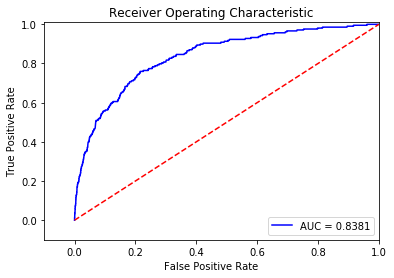

In [16]:
model = rf_random.best_estimator_
y_pred_score_cv = model.predict_proba(X_test)
# print('y_pred_score_cv:')
# print(y_pred_score_cv)

fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_pred_score_cv[:, 1])
roc_auc_cv = auc(fpr_cv,tpr_cv)
print('auc:', roc_auc_cv)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_cv, tpr_cv, 'b',label='AUC = %0.4f'% roc_auc_cv)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
confusion_matrix(y_test,model.predict(X_test))

array([[23303,     0],
       [  208,     0]], dtype=int64)

In [18]:
testCSV = pd.read_csv("C:/jyputerWork/amExpert/test_QyjYwdj.csv")
testCSV.head()
print(len(testCSV))

50226


In [19]:
testCSV1 = pd.merge(testCSV,
                 coup_id_mapping[['coupon_id','item_id']],
                left_on='coupon_id',
                       right_on='coupon_id',
                 how='left',indicator=True)
testCSV1.drop_duplicates(subset =['id'],keep='first',inplace=True) 
print(len(testCSV1))
testCSV1.head()

50226


,id,campaign_id,coupon_id,customer_id,item_id,_merge
0,3,22,869,967,1033,both
72,4,20,389,1566,1093,both
105,5,22,981,510,1690,both
124,8,25,1069,361,291,both
198,10,17,498,811,4078,both


In [20]:
testCSV2 = pd.merge(testCSV1,
                 item_mapping[['item_id','brand_type','category','brand']],
                 on='item_id',how='left')
print(len(testCSV2))
testCSV2.head()

50226


,id,campaign_id,coupon_id,customer_id,item_id,_merge,brand_type,category,brand
0,3,22,869,967,1033,both,Established,Grocery,1075
1,4,20,389,1566,1093,both,Established,Pharmaceutical,57
2,5,22,981,510,1690,both,Established,Grocery,1335
3,8,25,1069,361,291,both,Established,Grocery,1996
4,10,17,498,811,4078,both,Established,Grocery,209


In [21]:
testCSV3 = pd.merge(testCSV2,
                 cust_trans_data[['item_id','selling_price']],
                 on=['item_id'],how='left')
testCSV3.drop_duplicates(subset =['id'],keep='last',inplace=True) 
testCSV3.head()

,id,campaign_id,coupon_id,customer_id,item_id,_merge,brand_type,category,brand,selling_price
7,3,22,869,967,1033,both,Established,Grocery,1075,89.05
8,4,20,389,1566,1093,both,Established,Pharmaceutical,57,71.24
9,5,22,981,510,1690,both,Established,Grocery,1335,99.38
10,8,25,1069,361,291,both,Established,Grocery,1996,88.34
11,10,17,498,811,4078,both,Established,Grocery,209,213.01


In [22]:
print("length of train",len(testCSV3))
testCSV_changed = pd.merge(testCSV3,
                 cham_input[['campaign_id','campaign_type','duration']],
                 on='campaign_id',how='left')
print("length of train",len(testCSV_changed))

testCSV_changed = pd.merge(testCSV_changed,
                 customer_input[['customer_id','income_bracket','marital_status','rented','family_size','age_range']],
                 on='customer_id',how='left')
print("length of train",len(testCSV_changed))

testCSV_changed.isnull().any()

length of train 50226
length of train 50226
length of train 50226


id                False
campaign_id       False
coupon_id         False
customer_id       False
item_id           False
_merge            False
brand_type        False
category          False
brand             False
selling_price     False
campaign_type     False
duration          False
income_bracket     True
marital_status     True
rented             True
family_size        True
age_range          True
dtype: bool

In [23]:
testCSV_changed['income_bracket'] = testCSV_changed['income_bracket'].fillna(testCSV_changed['income_bracket'].mode())
testCSV_changed['marital_status'] = testCSV_changed['marital_status'].fillna("None")
testCSV_changed['rented'] = testCSV_changed['rented'].fillna(-1)
testCSV_changed['family_size'] = testCSV_changed['family_size'].fillna("None")
testCSV_changed['family_size'] = testCSV_changed['family_size'].astype(str)
testCSV_changed['age_range'] = testCSV_changed['age_range'].fillna("None")
testCSV_changed['age_range'] = testCSV_changed['age_range'].astype(str)
testCSV_changed.head()

,id,campaign_id,coupon_id,customer_id,item_id,_merge,brand_type,category,brand,selling_price,campaign_type,duration,income_bracket,marital_status,rented,family_size,age_range
0,3,22,869,967,1033,both,Established,Grocery,1075,89.05,X,32.0,5.0,None,0.0,1,36-45
1,4,20,389,1566,1093,both,Established,Pharmaceutical,57,71.24,Y,130.0,9.0,None,0.0,2,26-35
2,5,22,981,510,1690,both,Established,Grocery,1335,99.38,X,32.0,1.0,None,0.0,2,26-35
3,8,25,1069,361,291,both,Established,Grocery,1996,88.34,Y,32.0,3.0,None,0.0,1,18-25
4,10,17,498,811,4078,both,Established,Grocery,209,213.01,Y,32.0,NaN,None,-1.0,None,None


In [24]:
print(columnsToEncode)
testCSV_dataModified = testCSV_changed
testCSV_encodedDF = testCSV_dataModified[columnsToEncode].apply(encoder.fit_transform)
testCSV_encodedDF.head()

['marital_status', 'campaign_type', 'brand_type', 'rented', 'family_size', 'age_range', 'coupon_id', 'campaign_id']


,marital_status,campaign_type,brand_type,rented,family_size,age_range,coupon_id,campaign_id
0,1,0,0,1,0,2,255,6
1,1,1,0,1,1,1,110,4
2,1,0,0,1,1,1,290,6
3,1,1,0,1,0,0,322,9
4,1,1,0,0,5,6,145,1


In [25]:
testCSV_finalDF = pd.DataFrame(enc.transform(testCSV_encodedDF))
testCSV_finalDF.head()

,0,1,2,3,4,5,6,7,8,9,...,897,898,899,900,901,902,903,904,905,906
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
finalTestCSV = testCSV_finalDF
finalTestCSV[columnsToUse] = testCSV_changed[columnsToUse]
finalTestCSV.isna().any()

0                 False
1                 False
2                 False
3                 False
4                 False
5                 False
6                 False
7                 False
8                 False
9                 False
10                False
11                False
12                False
13                False
14                False
15                False
16                False
17                False
18                False
19                False
20                False
21                False
22                False
23                False
24                False
25                False
26                False
27                False
28                False
29                False
                  ...  
882               False
883               False
884               False
885               False
886               False
887               False
888               False
889               False
890               False
891               False
892             

In [27]:
ids = testCSV_changed['id']
predictions = model.predict_proba(finalTestCSV)[:, 1]
finalSubbmission = pd.DataFrame(list(zip(ids, predictions)),columns=['id','redemption_status'])
finalSubbmission.head()

,id,redemption_status
0,3,0.020814
1,4,0.004101
2,5,0.058013
3,8,0.010127
4,10,0.001533


In [28]:
finalSubbmission.to_csv("C:/jyputerWork/amExpert/submission1.csv",index=False)

In [29]:
print(len(finalSubbmission))

50226
